# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [45]:
import random as rn
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import discriminant_analysis
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from numpy import sqrt

In [46]:
#lam_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
#lam_M2, lam_MM = [], []
#for i in range(0, 8):
#    for j in range(0, 8):
#        if i == j:
#            lam_M2.append(lam_M[i]+lam_M[j])
#        else:
#            continue
#for i in range(1, 8):
#    for j in range(0, i):
#        lam_MM.append(lam_M[i]+lam_M[j])
#lam = lam_M + lam_M2 + lam_MM
#lam

In [47]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            continue
for i in range(1, 8):
    for j in range(0, i):
        lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM
# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 40

### 2.2 Генерации стратегий

In [48]:
# Генерация параметров для стратегий
# Запись параметров в data_strat

def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(-min(-a[i], a[i] + D*100), 0)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-83.72,-21.28,-89.69,-3.92
1,-83.72,21.28,-89.69,3.92
2,-34.00,-25.12,-64.79,-23.86
3,-34.00,25.12,-64.79,23.86
4,-45.55,-18.30,-83.60,-32.37
...,...,...,...,...
75,-103.99,8.89,-28.25,12.20
76,-90.54,-3.42,-91.35,-20.00
77,-90.54,3.42,-91.35,20.00
78,-21.52,-14.25,-6.34,-0.78


### 2.3 Подсчет макропараметров и создание выборки

In [49]:
# Подсчет макропараметров
# Запись их в data_macro

def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M5'].append(sigma1*(Aa[i] + D))

      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))

      collect['M3'].append(-2*(np.pi)*(np.pi)*Bj[i]*Bj[i])
      collect['M7'].append(-2*(np.pi)*(np.pi)*Ba[i]*Ba[i])
      
      collect['M4'].append(-((Aj[i] + D0)*(Aj[i] + D0) + (Bj[i]*Bj[i])/2))
      collect['M8'].append(-((Aa[i] + D0)*(Aa[i] + D0) + (Ba[i]*Ba[i])/2))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j == 1 or i == j == 5:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         elif i == j:
            Z = -np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            continue
   
   for i in range(2, 9):
      for j in range(1, i):
         if i == 5 and j == 1:
            Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            Z = -np.abs(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
            
   data_macro = {}   
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,36.28,-25.640,-8938.671731,-414.65760,30.31,-28.350,-303.320578,-395.37930,1316.2384,-657.409600,...,-2.515484e+05,-1.838729e+04,-1.719828e+04,-28688.722008,-20275.050504,-7.068332e+06,-3.278941e+05,-23967.893166,-22418.006310,-2.398534e+05
1,36.28,-46.920,-8938.671731,-414.65760,30.31,-32.270,-303.320578,-395.37930,1316.2384,-2201.486400,...,-2.515484e+05,-1.838729e+04,-1.957631e+04,-28688.722008,-37102.393512,-7.068332e+06,-3.278941e+05,-23967.893166,-25517.780022,-2.398534e+05
2,86.00,-73.440,-12455.724999,-1611.50720,55.21,-43.280,-11237.523675,-311.79390,7396.0000,-5393.433600,...,-3.621870e+07,-1.240847e+06,-9.727200e+05,-53628.550800,-45796.288032,-7.767238e+06,-1.004916e+06,-34428.282438,-26988.879984,-7.007583e+06
3,86.00,-98.560,-12455.724999,-1611.50720,55.21,-67.140,-11237.523675,-311.79390,7396.0000,-9714.073600,...,-3.621870e+07,-1.240847e+06,-1.508975e+06,-53628.550800,-61460.813568,-7.767238e+06,-1.004916e+06,-34428.282438,-41867.684892,-7.007583e+06
4,74.45,-65.300,-6610.463636,-765.24750,36.40,-20.215,-20683.076576,-708.86845,5542.8025,-4264.090000,...,-3.165535e+07,-1.505728e+06,-8.362168e+05,-105550.512205,-92578.219570,-9.371898e+06,-1.084920e+06,-51605.623160,-28659.551433,-2.932316e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,16.01,-20.455,-1560.031124,-1194.83615,91.75,-97.850,-2937.983838,-1817.48250,256.3201,-418.407025,...,-7.020819e+06,-5.391200e+05,-5.749634e+05,-58195.789650,-74353.209075,-5.670659e+06,-4.343188e+06,-333508.038750,-355681.325250,-1.067947e+07
76,29.46,-27.750,-230.877682,-427.73980,28.65,-18.650,-7895.683521,-655.82250,867.8916,-770.062500,...,-6.754596e+06,-4.524227e+05,-2.945090e+05,-38641.061700,-36398.148750,-3.028296e+05,-5.610428e+05,-37578.629250,-24462.179250,-1.035633e+07
77,29.46,-31.170,-230.877682,-427.73980,28.65,-38.650,-7895.683521,-655.82250,867.8916,-971.568900,...,-6.754596e+06,-4.524227e+05,-6.103363e+05,-38641.061700,-40883.974650,-3.028296e+05,-5.610428e+05,-37578.629250,-50695.079250,-1.035633e+07
78,98.48,-91.355,-4008.293087,-2451.84165,113.66,-113.270,-12.009335,-4052.89980,9698.3104,-8345.736025,...,-5.888997e+04,-2.729962e+03,-2.720595e+03,-798259.144608,-740505.322458,-3.249042e+07,-1.987414e+07,-921305.182536,-918143.920692,-9.734526e+04


In [50]:
# Подсчет фитнесса
# Запись в data_fit_macro

def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]
      
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + (4*r*p + (p + q - s)**2)**0.5
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   #data = data.loc[data.J !=0]
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [51]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,-0.027099,0.00,21.280,0.000000,0.00000,0.00,3.92,0.000000,0.0000,0.0000,...,0.000000e+00,2.378033e+03,0.000000,16827.343008,0.000000e+00,0.000000e+00,0.000000,3099.773712,0.000000e+00,-1.0
1,0.027099,0.00,-21.280,0.000000,0.00000,0.00,-3.92,0.000000,0.0000,0.0000,...,0.000000e+00,-2.378033e+03,0.000000,-16827.343008,0.000000e+00,0.000000e+00,0.000000,-3099.773712,0.000000e+00,1.0
2,-0.224302,-49.72,47.800,3517.053268,1196.84960,-24.90,14.93,10934.203097,-83.5854,-6079.7616,...,1.222460e+06,9.555218e+05,24939.828792,25521.237528,6.989066e+05,6.770222e+05,10460.389272,4570.873674,6.767729e+06,-1.0
3,0.224302,49.72,-47.800,-3517.053268,-1196.84960,24.90,-14.93,-10934.203097,83.5854,6079.7616,...,-1.222460e+06,-9.555218e+05,-24939.828792,-25521.237528,-6.989066e+05,-6.770222e+05,-10460.389272,-4570.873674,-6.767729e+06,1.0
4,-0.383479,-49.72,72.920,3517.053268,1196.84960,-24.90,38.79,10934.203097,-83.5854,-6079.7616,...,1.222460e+06,1.491776e+06,24939.828792,41185.763064,6.989066e+05,6.770222e+05,10460.389272,19449.678582,6.767729e+06,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.706386,69.02,-60.185,-3777.415406,-2024.10185,85.01,-74.62,7883.674186,-3397.0773,8830.4188,...,4.496927e+05,6.076157e+05,-759618.082908,-699621.347808,-3.218759e+07,-1.931309e+07,-883726.553286,-867448.841442,1.025899e+07,1.0
6316,-0.712191,-69.02,74.435,3777.415406,2024.10185,-85.01,75.40,-7883.674186,3397.0773,-8830.4188,...,-4.496927e+05,-6.075970e+05,759618.082908,815128.992108,3.218759e+07,1.931309e+07,883726.553286,873771.365130,-1.025899e+07,-1.0
6317,0.712191,69.02,-74.435,-3777.415406,-2024.10185,85.01,-75.40,7883.674186,-3397.0773,8830.4188,...,4.496927e+05,6.075970e+05,-759618.082908,-815128.992108,-3.218759e+07,-1.931309e+07,-883726.553286,-873771.365130,1.025899e+07,1.0
6318,-0.005805,0.00,14.250,0.000000,0.00000,0.00,0.78,0.000000,0.0000,0.0000,...,0.000000e+00,1.873456e+01,0.000000,115507.644300,0.000000e+00,0.000000e+00,0.000000,6322.523688,0.000000e+00,-1.0


In [52]:
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target

def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      tmp = max(np.abs(data_param['M' + str(i)]))
      max_M.append(tmp)
      Z = np.array(data_param['M' + str(i)])/tmp
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
            max_M.append(tmp)
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
         max_M.append(tmp)
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
         data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.200641,0.000000,0.000000,0.000000,0.035349,0.000000,0.000000,0.000000,0.129628,...,0.000000,0.000321,0.000000,0.017792,0.000000,0.000000,0.000000,0.002734,0.000000,-1.0
1,0.000000,-0.200641,0.000000,0.000000,0.000000,-0.035349,0.000000,0.000000,0.000000,-0.129628,...,0.000000,-0.000321,0.000000,-0.017792,0.000000,0.000000,0.000000,-0.002734,0.000000,1.0
2,-0.489129,0.450688,0.061673,0.374324,-0.225564,0.134632,0.229864,-0.017565,-0.535411,0.397598,...,0.213827,0.128830,0.028338,0.026985,0.003707,0.034072,0.009227,0.004031,0.056221,-1.0
3,0.489129,-0.450688,-0.061673,-0.374324,0.225564,-0.134632,-0.229864,0.017565,0.535411,-0.397598,...,-0.213827,-0.128830,-0.028338,-0.026985,-0.003707,-0.034072,-0.009227,-0.004031,-0.056221,1.0
4,-0.489129,0.687535,0.061673,0.374324,-0.225564,0.349790,0.229864,-0.017565,-0.535411,0.760323,...,0.213827,0.201131,0.028338,0.043547,0.003707,0.034072,0.009227,0.017152,0.056221,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.678997,-0.567462,-0.066239,-0.633053,0.770088,-0.672889,0.165735,-0.713888,0.777646,-0.619075,...,0.078658,0.081923,-0.863133,-0.739737,-0.170726,-0.971964,-0.779501,-0.764970,0.085224,1.0
6316,-0.678997,0.701820,0.066239,0.633053,-0.770088,0.679922,-0.165735,0.713888,-0.777646,0.854700,...,-0.078658,-0.081920,0.863133,0.861868,0.170726,0.971964,0.779501,0.770546,-0.085224,-1.0
6317,0.678997,-0.701820,-0.066239,-0.633053,0.770088,-0.679922,0.165735,-0.713888,0.777646,-0.854700,...,0.078658,0.081920,-0.863133,-0.861868,-0.170726,-0.971964,-0.779501,-0.770546,0.085224,1.0
6318,0.000000,0.134358,0.000000,0.000000,0.000000,0.007034,0.000000,0.000000,0.000000,0.235626,...,0.000000,0.000003,0.000000,0.122131,0.000000,0.000000,0.000000,0.005576,0.000000,-1.0


### 2.4 Проверка корреляции и распределения

<Figure size 720x720 with 0 Axes>

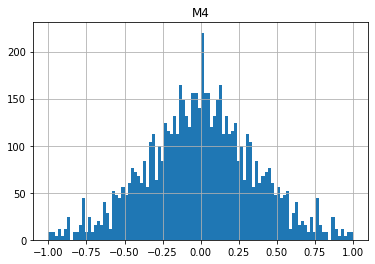

In [53]:
# Реализуем гистограмму
histogram = data_norm[['M4']]
plt.figure(figsize=(10, 10))
histogram.hist(bins=100)
plt.show()

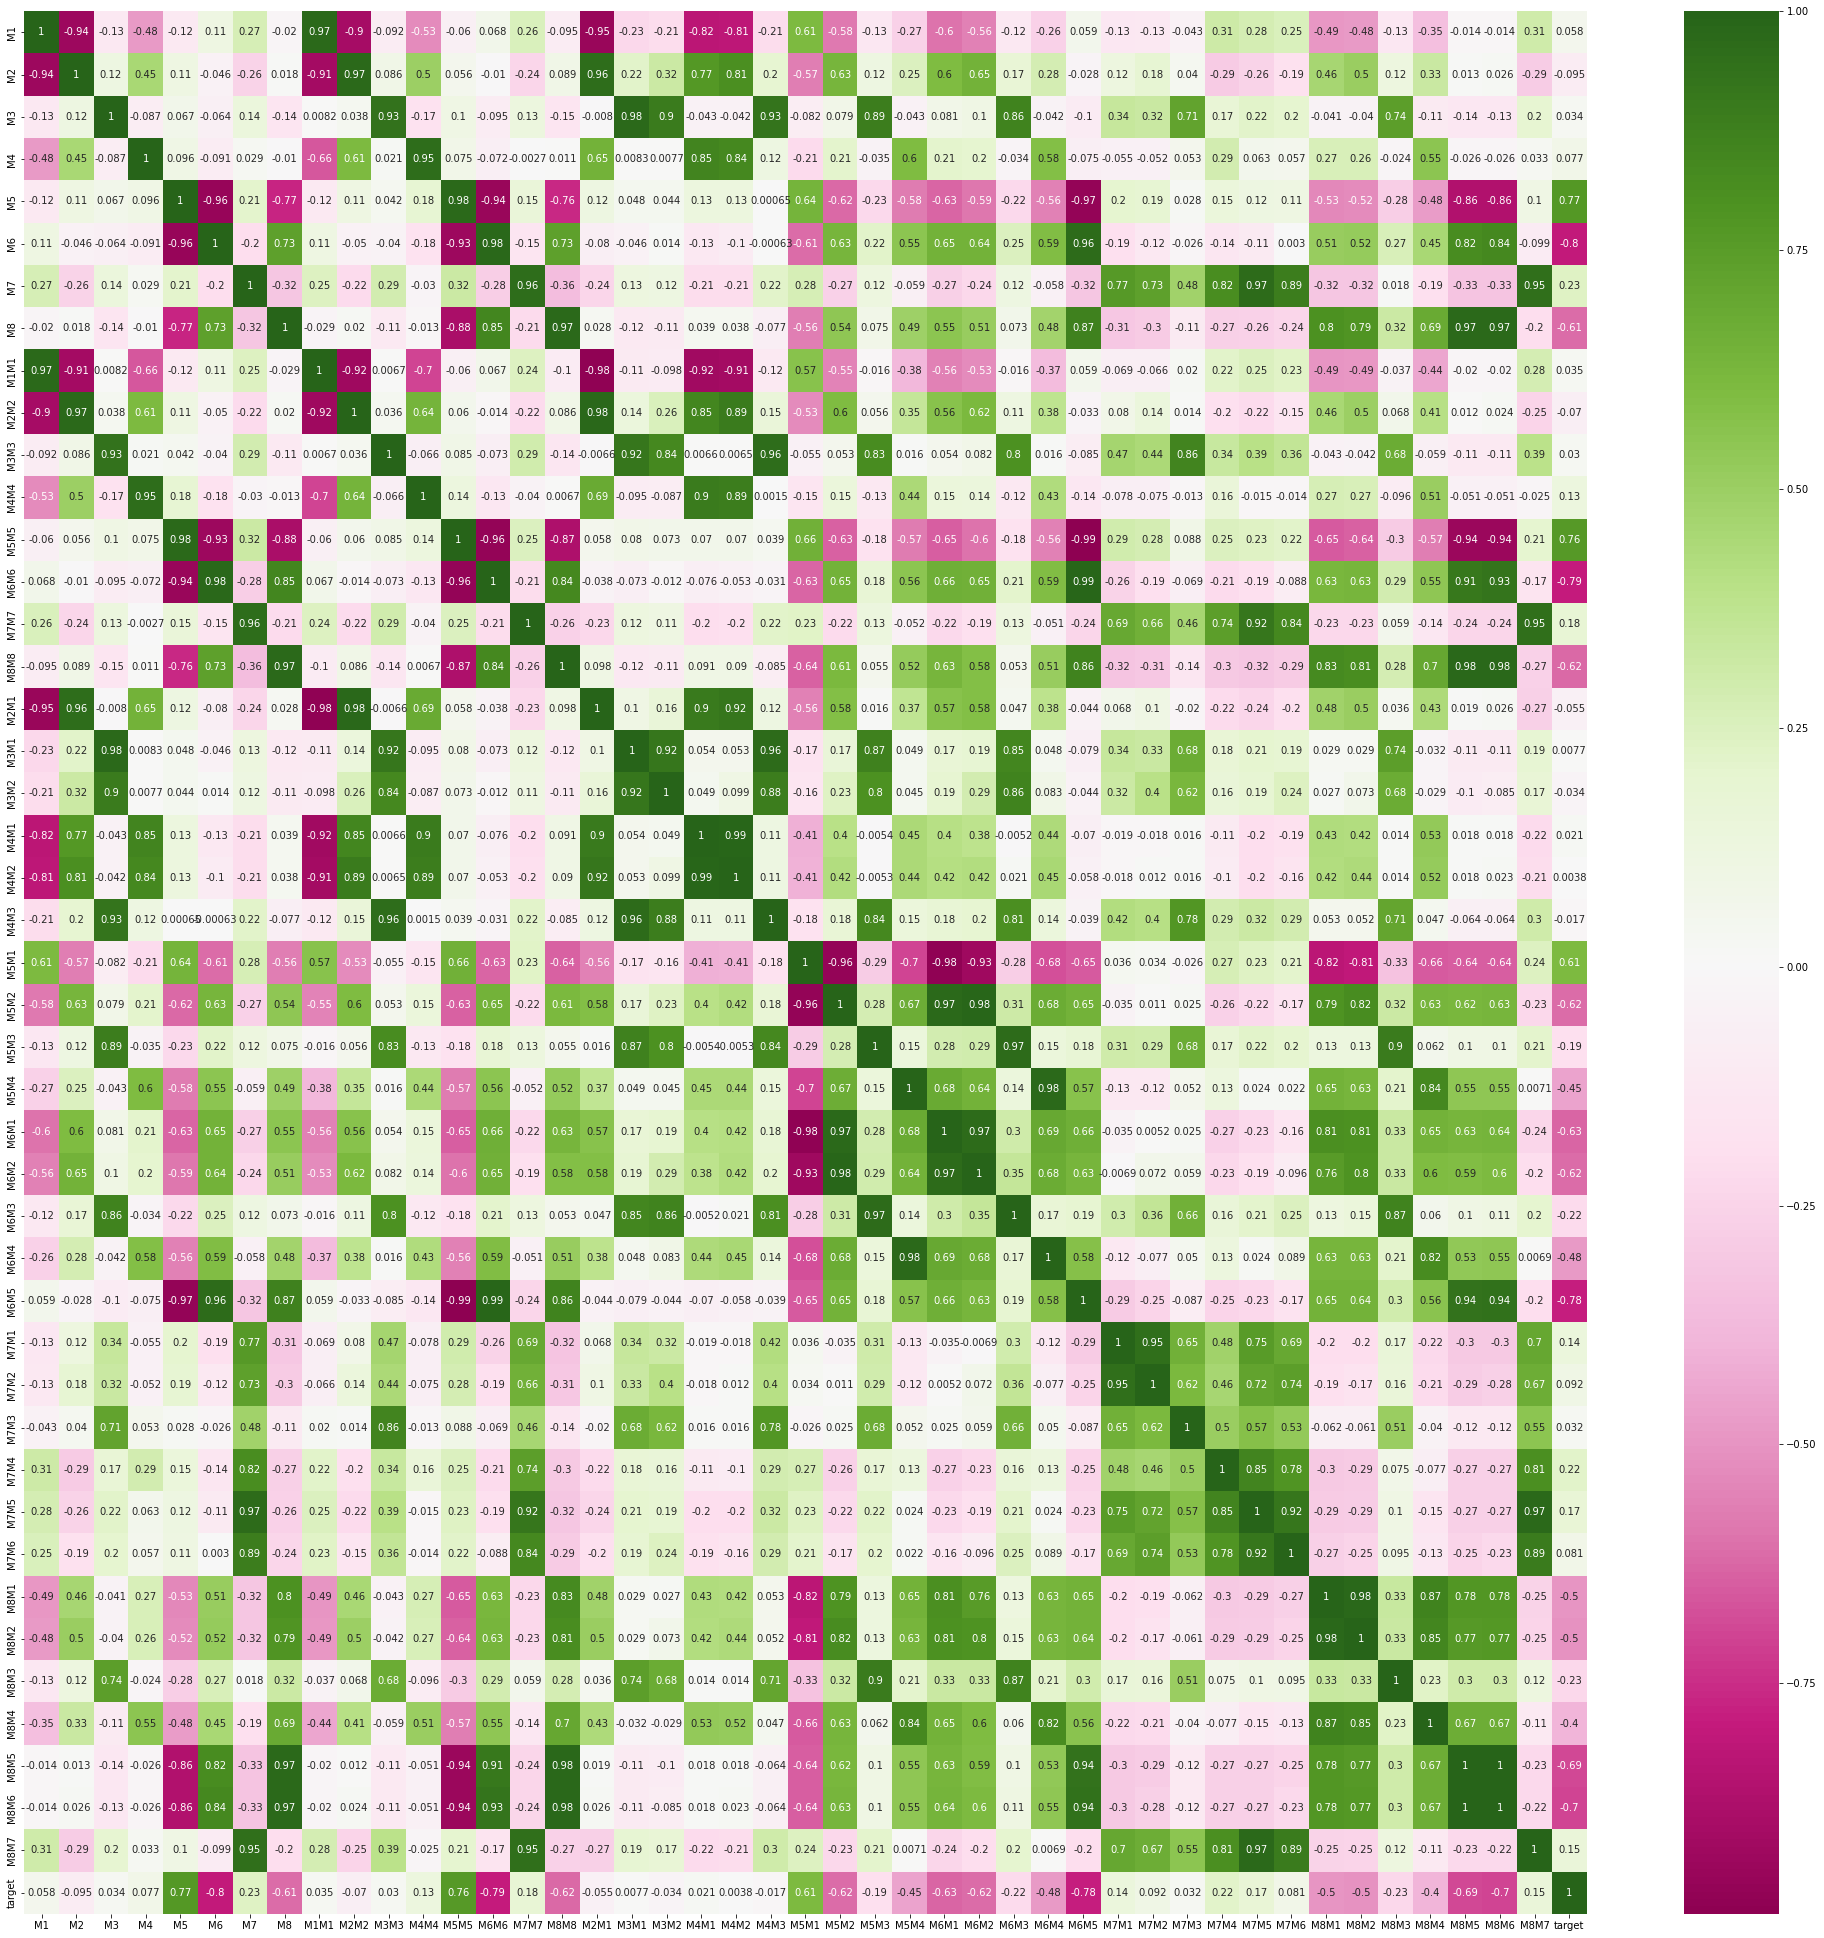

In [54]:
#correlation = data_norm[['M' + str(i) for i in range(1, 9)]]
correlation = data_norm
plt.figure(figsize=(35, 35))
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")
plt.savefig('Matrix_corr.jpg')

### 2.5 Реализация методов машинного обучения

In [55]:
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [56]:
# Реализуем SVM
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [57]:
# Реализуем LDA
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [58]:
# Избавляемся от нормализованных коэффициентов
machine_SVM = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
machine_LDA = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]

In [59]:
# Подсчет точности SVM и LDA
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test)*100)
print('     LDA: ', accuracy_score(LDA_prediction, y_test)*100)

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  99.20886075949366
     LDA:  98.73417721518987
Logloss:
     SVM:  0.007933513377671956
     LDA:  0.008441125739461479


<AxesSubplot:>

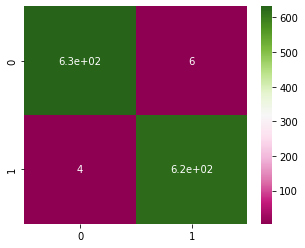

In [60]:
# Подсчет матрицы ошибок
plt.figure(figsize=(5, 4))
# cnf_matrix = confusion_matrix(y_test, LDA_prediction)
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")

### 2.6 Графики 

#### 2.6.1 Двумерные

In [61]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [62]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [63]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [64]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='x')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='.')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Вывод частных производных

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 Реализация проверок

In [65]:
# Считаем значения искомого фитнеса
def middle_SPQR():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]

      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': s*s, 'PP': p*p, 'QQ': q*q, 
               'RR': r*r, 'SP': s*p, 'SQ': s*q, 'SR': s*r, 'PQ': p*q, 'PR': p*r, 'QR': q*r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': s*s, 'PP': p*p, 'QQ': q*q, 
               'RR': r*r, 'SP': s*p, 'SQ': s*q, 'SR': s*r, 'PQ': p*q, 'PR': p*r, 'QR': q*r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv("data_middle_SPQR.csv", index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR
data_SPQR = middle_SPQR()

In [66]:
# Считаем значения восстановленного фитнеса
def fitness_restored(machine):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    data = {}
    restored_fit = pd.DataFrame(data)
    J = []
    for i in range(len(data_macro)):
        j = (dot(data_macro.loc[i], machine))
    
        p = machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]
        q = machine[1]*M2[i]
        r = machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]
        s = machine[5]*M6[i]

        row = {'F_SVM': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': s*s, 'PP': p*p, 'QQ': q*q, 
               'RR': r*r, 'SP': s*p, 'SQ': s*q, 'SR': s*r, 'PQ': p*q, 'PR': p*r, 'QR': q*r}
        restored_fit = restored_fit.append(row, ignore_index=True)
    restored_fit.to_csv('data_dot.csv', index=False)
    restored_fit = restored_fit.sort_values(by='F_SVM', ascending=False)
    #restored_fit = restored_fit.reset_index(drop=True)
    return restored_fit
restored_fit_SVM = fitness_restored(machine_SVM)
restored_fit_LDA = fitness_restored(machine_LDA)

In [67]:
# Реализация косинуса между двумя векторами
def cosine(a, b):
    #! Числитель
    def numerator(a, b):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*b[i]
        return summ
    #! Знаминатель
    def denominator(a):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*a[i]
        return summ
    return numerator(a, b)/sqrt(denominator(a) * denominator(b))

In [68]:
# Подсчет частных производных искомого фитнеса
def differential(i):
    s = data_SPQR['S'].tolist()[i]
    p = data_SPQR['P'].tolist()[i]
    q = data_SPQR['Q'].tolist()[i]
    r = data_SPQR['R'].tolist()[i]
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

In [69]:
# Функция подсчета косинусов между векторами и нахождение стратегии с максимальными сходством по косинусу
def corners():
   cos = []
   coef = [0]*44
   for i in range(len(data_strat)):
      hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(i)
      coef[0] = lam[0]*hp            #M1
      coef[1] = lam[1]*hq            #M2
      coef[2] = lam[2]*hp            #M3
      coef[3] = lam[3]*hp            #M4
      coef[4] = lam[4]*hr            #M5
      coef[5] = lam[5]*hs            #M6
      coef[6] = lam[6]*hr            #M7
      coef[7] = lam[7]*hr            #M8
      coef[8] = lam[8]*hpp           #M11
      coef[9] = lam[9]*hqq           #M22
      coef[10] = lam[10]*hpp         #M33
      coef[11] = lam[11]*hpp         #M44
      coef[12] = lam[12]*hrr         #M55
      coef[13] = lam[13]*hss         #M66
      coef[14] = lam[14]*hrr         #M77
      coef[15] = lam[15]*hrr         #M88
      coef[16] = lam[16]*hpq         #M12
      coef[17] = lam[17]*hpp         #M13
      coef[18] = lam[18]*hpq         #M23
      coef[19] = lam[19]*hpp         #M14
      coef[20] = lam[20]*hpq         #M24
      coef[21] = lam[21]*hpp         #M34
      coef[22] = lam[22]*hpr         #M15
      coef[23] = lam[23]*hqr         #M25
      coef[24] = lam[24]*hpr         #M35
      coef[25] = lam[25]*hpr         #M45
      coef[26] = lam[26]*hsp         #M16
      coef[27] = lam[27]*hsq         #M26
      coef[28] = lam[28]*hsp         #M36
      coef[29] = lam[29]*hsp         #M46
      coef[30] = lam[30]*hsr         #M56
      coef[31] = lam[31]*hpr         #M17
      coef[32] = lam[32]*hqr         #M27
      coef[33] = lam[33]*hpr         #M37
      coef[34] = lam[34]*hpr         #M47
      coef[35] = lam[35]*hrr         #M57
      coef[36] = lam[36]*hsr         #M67
      coef[37] = lam[37]*hpr         #M18
      coef[38] = lam[38]*hqr         #M28
      coef[39] = lam[39]*hpr         #M38
      coef[40] = lam[40]*hpr         #M48
      coef[41] = lam[41]*hrr         #M58
      coef[42] = lam[42]*hsr         #M68
      coef[43] = lam[43]*hrr         #M78
      cos.append(cosine(coef, machine_SVM))
   best_index = cos.index(max([i for i in cos if not isinstance(i, complex)]))
   result = [i for i in cos if not isinstance(i, complex)]
   best_corn = max(np.abs(result))
   return best_index
best_index = corners()

#### 2.2.1 Проверка Тейлора

In [70]:
# Создаем таблицу с Тейлором
def h_machine(ju, machine):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()
    M3 = data_macro['M3'].tolist()
    M4 = data_macro['M4'].tolist()
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    
    hs = (machine[5]*M6[ju])/(lam[5]*M6[ju])
    hp = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq = (machine[1]*M2[i])/(lam[1]*M2[i])
    hr = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss = ((machine[5]*M6[i])*(machine[5]*M6[i]))/((lam[5]*M6[i])*(lam[5]*M6[i]))
    hpp = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hqq = ((machine[1]*M2[i])*(machine[1]*M2[i]))/((lam[1]*M2[i])*(lam[1]*M2[i]))
    hrr = ((machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hsp = ((machine[5]*M6[i])*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/((lam[5]*M6[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq = ((machine[5]*M6[i])*(machine[1]*M2[i]))/((lam[5]*M6[i])*(lam[1]*M2[i]))
    hsr = ((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr = ((machine[1]*M2[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[1]*M2[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
hs1, hp1, hq1, hr1, hss1, hpp1, hqq1, hrr1, hsp1, hsq1, hsr1, hpq1, hpr1, hqr1 = h_machine(best_index, machine_SVM)
hs2, hp2, hq2, hr2, hss2, hpp2, hqq2, hrr2, hsp2, hsq2, hsr2, hpq2, hpr2, hqr2 = h_machine(best_index, machine_LDA)

df=pd.DataFrame([['hp',  hp /hp,  hp1 /hp1, hp2 /hp2],
                 ['hq',  hq /hp,  hq1 /hp1, hq2 /hp2],
                 ['hr',  hr /hp,  hr1 /hp1, hr2 /hp2],
                 ['hs',  hs /hp,  hs1 /hp1, hs2 /hp2],
                 ['hpp', hpp/hp,  hpp1/hp1, hpp2/hp2],
                 ['hqq', hqq/hp,  hqq1/hp1, hqq2/hp2],
                 ['hrr', hrr/hp,  hrr1/hp1, hrr2/hp2],
                 ['hss', hss/hp,  hss1/hp1, hss2/hp2],
                 ['hsp', hsp/hp,  hsp1/hp1, hsp2/hp2],
                 ['hsq', hsq/hp,  hsq1/hp1, hsq2/hp2],
                 ['hsr', hsr/hp,  hsr1/hp1, hsr2/hp2],
                 ['hpq', hpq/hp,  hpq1/hp1, hpq2/hp2],
                 ['hpr', hpr/hp,  hpr1/hp1, hpr2/hp2],
                 ['hqr', hqr/hp,  hqr1/hp1, hqr2/hp2],
                 ], 
    columns=['h', 'Тейлор', 'SVC', 'LDA'])
df

,h,Тейлор,SVC,LDA
0,hp,1.000000,1.000000,1.000000
1,hq,-0.173418,-6.954822,177.274110
2,hr,0.240453,-0.043243,-15.683047
3,hs,-1.627001,-2.133681,-23.851255
4,hpp,-4.606483,5.484207,0.658789
5,hqq,0.464119,265.268573,20703.187379
6,hrr,-0.095106,0.010255,162.034501
7,hss,0.464119,24.967359,374.773659
8,hsp,0.938724,-11.701545,-15.712953
9,hsq,-0.464119,81.382158,-2785.499827


#### 2.2.2 Альтернативная проверка

Как показано выше в таблице проверка по Тейлору не дала нам хорошего сходства, это печально. Однако была придумана альтернативная проверка, которая как мне кажется более подробно показывает работоспособность и правильность данной программы.

Суть проверки состоит в подщете максимальных фитнессов по эмпирическим данным и по коэффициентам полученным в ходе машинного обучения, если программа работает правильно, то индексы стратегий должны убывыть, но при этом сохранять свой порядок, для каждого вида фитнесса

К сожалению мне не охото отдельно выность индексы стратегий в отдельный фрейм данных, так что будут просто приведены 3 таблицы, где стоит обращать внимани на неподписанный столбец в самом начале, и сравнить эти столбцы для каждой таблицы, получится достаточно хорошее сходство, что говорит о правильности работы программы, и выдается желанный результат

Хотя конечно важна проверка по Тейлору, но к сожалению она почему то не работает, есть предположение почему так, в одной из генераций косинус между векторами эмпирических данных и коэффициетов машинного обучения дал значени 0.999 и при таком случае было сходство гораздо ближе (отличия на 1 порядок), в других же случаях, например при косинусе 0.97 получается сербезное расхождение (отличия на 4-5 порядков). Поэтому есть предположение, что проверка по Тейлору крайне капризна и область ее применения крайне мала (скорее всего косинус должен быть 0.99999 и больше), что плохо. Но возможно у нас есть проблема в подаваемых данных и надо что-то доработать, чтобы получить результат гораздо лучше.

In [71]:
restored_fit_SVM[:15]

,F_SVM,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
29,26.602445,5.572510,-0.119728,0.287634,-0.297557,31.052866,0.014335,0.082733,0.088540,-0.667186,1.602843,-1.658137,-0.034438,0.035626,-0.085587
28,26.505702,5.570170,-0.119728,0.276680,-0.297557,31.026789,0.014335,0.076552,0.088540,-0.666906,1.541153,-1.657440,-0.033126,0.035626,-0.082328
15,25.324523,5.499960,-0.427822,0.320924,-0.239033,30.249563,0.183032,0.102992,0.057137,-2.353006,1.765070,-1.314670,-0.137299,0.102264,-0.076711
14,24.622130,5.460175,-0.427822,0.255900,-0.239033,29.813511,0.183032,0.065485,0.057137,-2.335985,1.397260,-1.305160,-0.109480,0.102264,-0.061168
79,24.403923,5.338245,-0.466096,0.322236,-0.141472,28.496859,0.217245,0.103836,0.020014,-2.488134,1.720176,-0.755215,-0.150193,0.065940,-0.045588
78,23.911978,5.301736,-0.466096,0.278755,-0.141472,28.108406,0.217245,0.077704,0.020014,-2.471117,1.477884,-0.750050,-0.129926,0.065940,-0.039436
7,22.983799,5.382477,0.494630,0.188664,-0.104381,28.971056,0.244659,0.035594,0.010895,2.662333,1.015480,-0.561830,0.093319,-0.051630,-0.019693
47,22.299128,5.346670,-0.284198,0.285330,-0.091042,28.586880,0.080769,0.081413,0.008289,-1.519515,1.525567,-0.486774,-0.081090,0.025874,-0.025977
6,21.611217,5.114277,0.494630,0.164375,-0.104381,26.155833,0.244659,0.027019,0.010895,2.529673,0.840661,-0.533835,0.081305,-0.051630,-0.017158
37,21.223227,5.372413,0.206945,0.125745,-0.171469,28.862826,0.042826,0.015812,0.029402,1.111794,0.675557,-0.921204,0.026022,-0.035485,-0.021561


In [72]:
restored_fit_LDA[:15]

,F_SVM,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
29,10.912041,7.482823,-0.914187,-0.880709,-5.169389,55.992635,0.835738,0.775648,26.722578,-6.840698,-6.590188,-38.681618,0.805132,4.725787,4.552726
28,10.903701,7.479680,-0.914187,-0.847168,-5.169389,55.945614,0.835738,0.717693,26.722578,-6.837825,-6.336544,-38.665373,0.774470,4.725787,4.379340
15,10.489527,7.385402,-1.068197,-0.982640,-4.999201,54.544168,1.141044,0.965581,24.992015,-7.889062,-7.257191,-36.921114,1.049653,5.340130,4.912415
14,10.435251,7.331978,-1.068197,-0.783543,-4.999201,53.757906,1.141044,0.613939,24.992015,-7.831995,-5.744918,-36.654037,0.836978,5.340130,3.917088
78,10.279540,7.119225,-1.252209,-0.853521,-4.710619,50.683364,1.568027,0.728498,22.189931,-8.914757,-6.076408,-33.535956,1.068787,5.898679,4.020612
79,10.271612,7.168249,-1.252209,-0.986657,-4.710619,51.383799,1.568027,0.973493,22.189931,-8.976146,-7.072606,-33.766891,1.235501,5.898679,4.647767
7,9.913346,7.227644,0.059417,-0.577672,-4.547431,52.238842,0.003530,0.333705,20.679127,0.429447,-4.175206,-32.867212,-0.034324,-0.270196,2.626922
47,9.793940,7.179563,-0.407669,-0.873655,-4.516683,51.546120,0.166194,0.763273,20.400422,-2.926884,-6.272461,-32.427806,0.356162,1.841311,3.946022
6,9.686181,6.867503,0.059417,-0.503302,-4.547431,47.162603,0.003530,0.253313,20.679127,0.408049,-3.456430,-31.229496,-0.029905,-0.270196,2.288732
37,9.494428,7.214131,-0.053641,-0.385021,-4.801350,52.043689,0.002877,0.148241,23.052959,-0.386971,-2.777593,-34.637566,0.020653,0.257548,1.848621


In [73]:
data_SPQR[:15]

,J,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
29,1.105679,-0.47622,0.118812,-0.007541,0.428271,0.226785,0.014116,0.000057,0.183416,-0.056580,0.003591,-0.203951,-0.000896,0.050884,-0.003230
28,1.105261,-0.47602,0.118812,-0.007254,0.428271,0.226595,0.014116,0.000053,0.183416,-0.056557,0.003453,-0.203866,-0.000862,0.050884,-0.003107
15,1.087089,-0.47002,0.109612,-0.008414,0.432474,0.220919,0.012015,0.000071,0.187033,-0.051520,0.003955,-0.203271,-0.000922,0.047404,-0.003639
14,1.080636,-0.46662,0.109612,-0.006709,0.432474,0.217734,0.012015,0.000045,0.187033,-0.051147,0.003131,-0.201801,-0.000735,0.047404,-0.002902
79,1.070271,-0.45620,0.115533,-0.008448,0.438785,0.208118,0.013348,0.000071,0.192532,-0.052706,0.003854,-0.200174,-0.000976,0.050694,-0.003707
78,1.064466,-0.45308,0.115533,-0.007308,0.438785,0.205281,0.013348,0.000053,0.192532,-0.052346,0.003311,-0.198805,-0.000844,0.050694,-0.003207
7,1.050055,-0.45998,0.090192,-0.004946,0.440138,0.211582,0.008135,0.000024,0.193722,-0.041486,0.002275,-0.202455,-0.000446,0.039697,-0.002177
47,1.037462,-0.45692,0.083335,-0.007481,0.441011,0.208776,0.006945,0.000056,0.194491,-0.038078,0.003418,-0.201507,-0.000623,0.036752,-0.003299
6,1.008639,-0.43706,0.090192,-0.004310,0.440138,0.191021,0.008135,0.000019,0.193722,-0.039419,0.001884,-0.192367,-0.000389,0.039697,-0.001897
37,1.003089,-0.45912,0.053577,-0.003297,0.436964,0.210791,0.002870,0.000011,0.190937,-0.024598,0.001514,-0.200619,-0.000177,0.023411,-0.001441
